In [ ]:
#Importación de Librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr, pearsonr

In [ ]:
#Importamos la base de datos csv a utilizar

# Leer desde la carpeta sample_data
df = pd.read_csv("/Medicaldataset.csv")

# Exploración inicial
print(df.shape)     # cantidad de filas y columnas
print(df.head())    # primeras 5 filas
print(df.info())    # información de columnas y tipos
print(df.describe())# estadísticas descriptivas


(1319, 9)
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age               

📊 Test de normalidad Shapiro-Wilk:

Age: W=0.991, p=4.871e-07 → NO normal ❌ (usar Spearman/Kendall)
Heart rate: W=0.184, p=8.611e-60 → NO normal ❌ (usar Spearman/Kendall)
Systolic blood pressure: W=0.972, p=2.378e-15 → NO normal ❌ (usar Spearman/Kendall)
Diastolic blood pressure: W=0.984, p=7.236e-11 → NO normal ❌ (usar Spearman/Kendall)
Blood sugar: W=0.785, p=1.639e-38 → NO normal ❌ (usar Spearman/Kendall)
CK-MB: W=0.314, p=9.627e-57 → NO normal ❌ (usar Spearman/Kendall)
Troponin: W=0.335, p=3.214e-56 → NO normal ❌ (usar Spearman/Kendall)


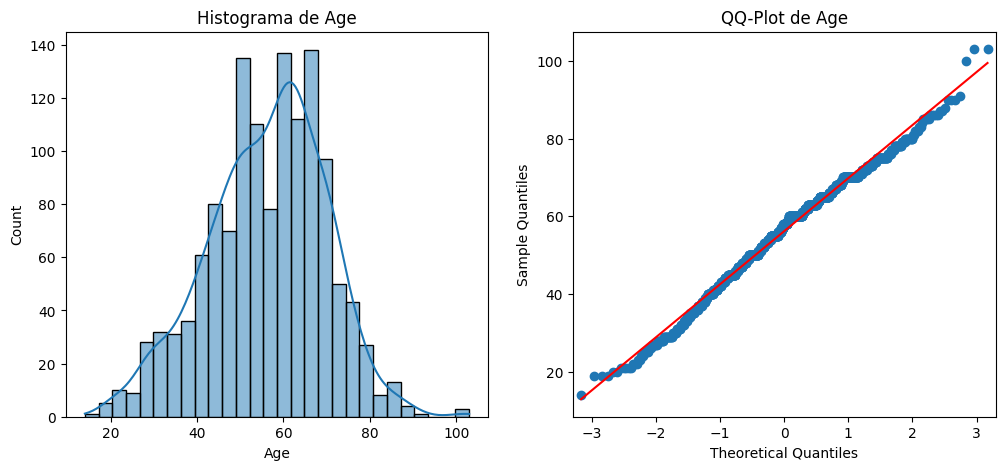

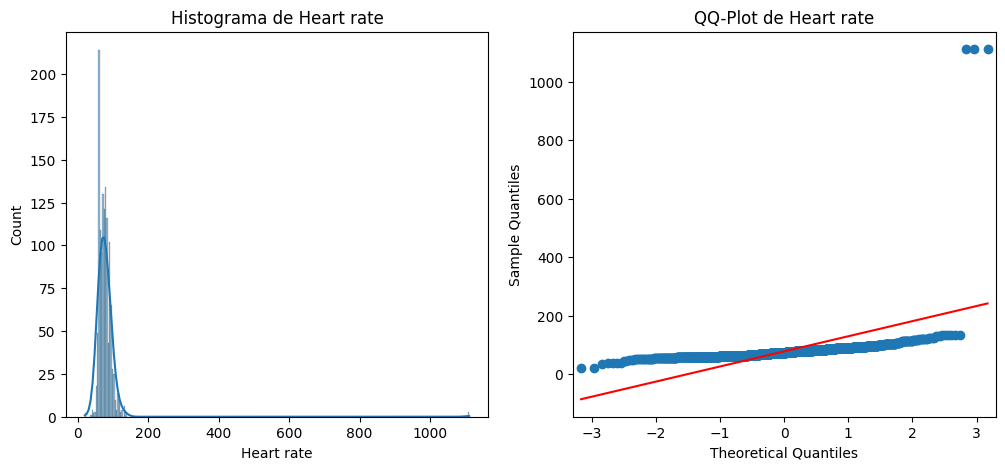

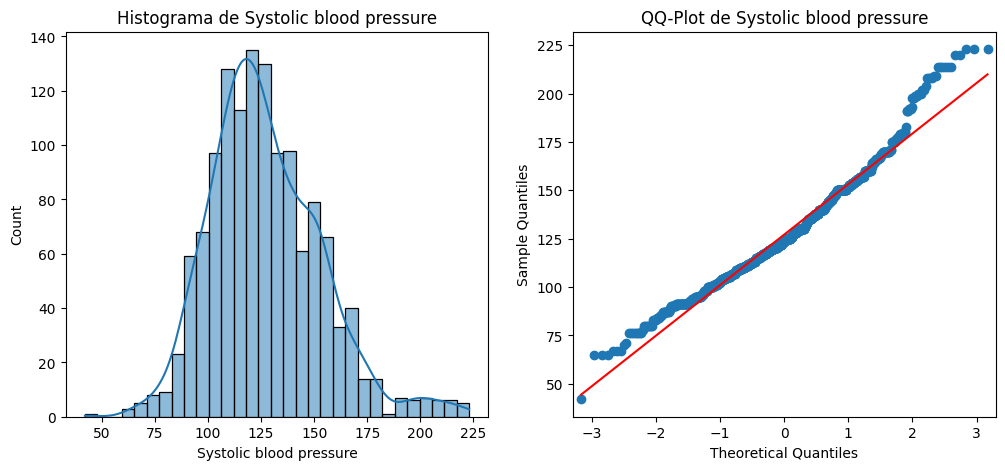

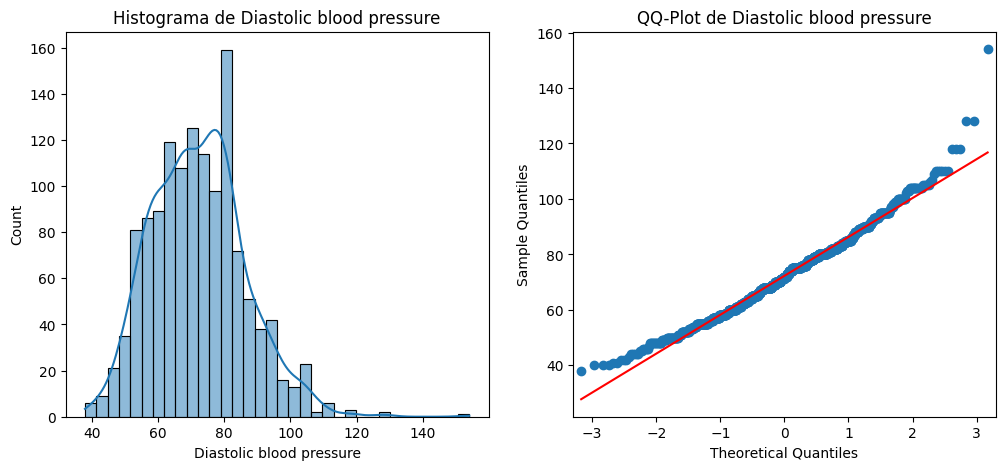

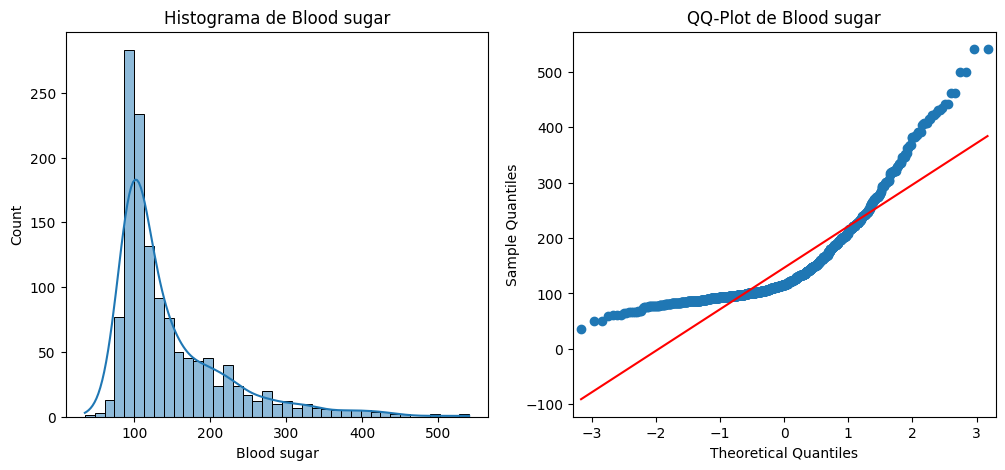

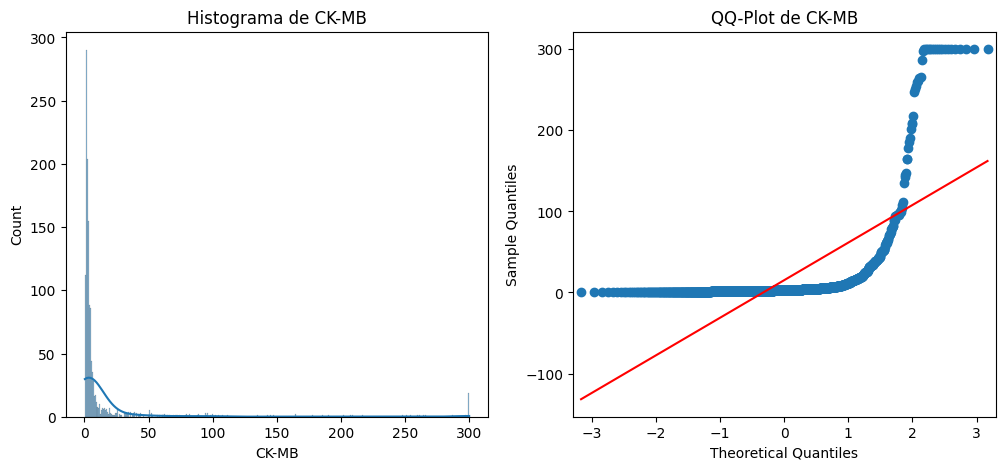

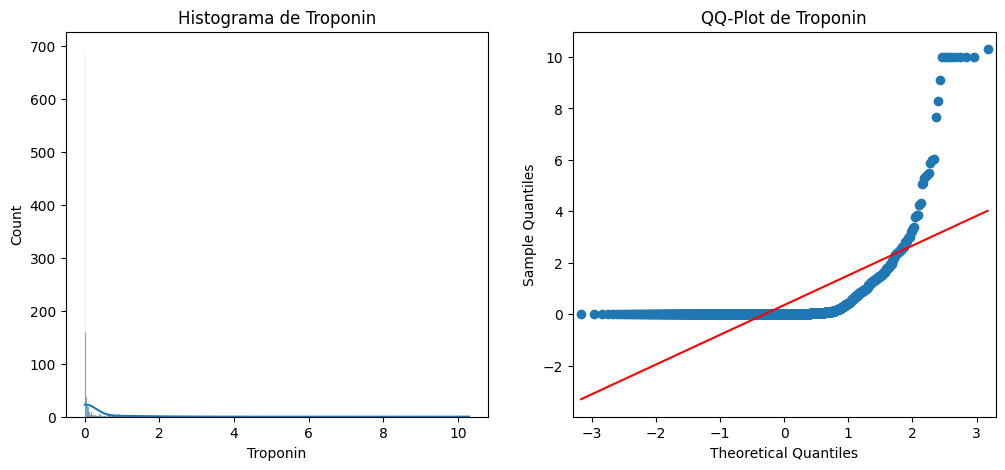

In [ ]:
import pandas as pd
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Seleccionamos solo las variables numéricas continuas
vars_numericas = ["Age", "Heart rate", "Systolic blood pressure",
                  "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]

# 1. Test de Shapiro-Wilk
print("📊 Test de normalidad Shapiro-Wilk:\n")
for col in vars_numericas:
    stat, p = shapiro(df[col])
    print(f"{col}: W={stat:.3f}, p={p:.3e} → ", end="")
    if p > 0.05:
        print("Distribución ~ normal ✅ (usar Pearson)")
    else:
        print("NO normal ❌ (usar Spearman/Kendall)")

# 2. Histogramas + QQ-plots
for col in vars_numericas:
    plt.figure(figsize=(12,5))

    # Histograma con KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histograma de {col}")

    # QQ-plot
    plt.subplot(1,2,2)
    sm.qqplot(df[col], line='s', ax=plt.gca())
    plt.title(f"QQ-Plot de {col}")

    plt.show()



Basándonos en los resultados del test de Shapiro-Wilk y los gráficos de distribución:

Justificación de elegir Spearman sobre Pearson o Kendall

Distribuciones no normales:

El test de Shapiro-Wilk indicó que todas las variables continuas (Age, Heart rate, Systolic blood pressure, Diastolic blood pressure, Blood sugar, CK-MB, Troponin) NO siguen una distribución normal (p < 0.05 en todos los casos).

Pearson asume normalidad de las variables para que la correlación lineal sea válida y fiable. Al no cumplirse esta condición, Pearson puede dar resultados engañosos.

Relaciones posiblemente no lineales:

La correlación de Spearman no asume linealidad, sino que mide la relación monótona entre variables (es decir, si una variable tiende a aumentar cuando la otra aumenta, aunque no sea lineal).

Dado que algunas variables como CK-MB o Troponin tienen distribuciones muy sesgadas, es probable que la relación entre estas y otras variables no sea estrictamente lineal.

Robustez ante valores atípicos:

Pearson es muy sensible a outliers y valores extremos, que claramente existen en el dataset (Heart rate llega hasta 1111, Troponin hasta 10.3, Blood sugar hasta 541).

Spearman usa los rangos en lugar de los valores absolutos, reduciendo la influencia de estos extremos y proporcionando una estimación más robusta de la relación.

Diferencia con Kendall:

Kendall también mide correlación basada en rangos y es más conservador que Spearman.

Para datasets grandes como este (n=1319), Spearman es preferido porque es computacionalmente más eficiente y produce resultados muy similares a Kendall.


Conclusión:

Elegimos Spearman porque:

Las variables no siguen una distribución normal.

Las relaciones pueden ser monótonas, no necesariamente lineales.

Hay valores atípicos que podrían sesgar Pearson.

Es más práctico que Kendall en un dataset grande.

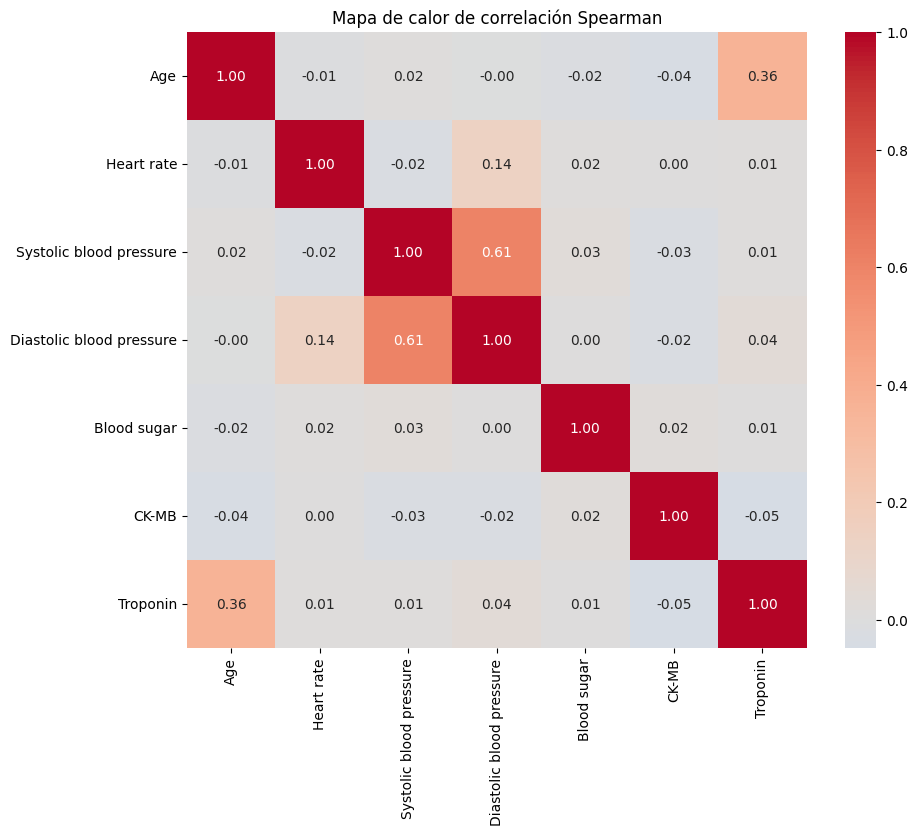

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las variables numéricas continuas
vars_numericas = ["Age", "Heart rate", "Systolic blood pressure",
                  "Diastolic blood pressure", "Blood sugar", "CK-MB", "Troponin"]

# Calculamos la correlación Spearman
corr_spearman = df[vars_numericas].corr(method='spearman')

# Creamos el mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlación Spearman")
plt.show()


1 Lectura general

Los valores van de -1 a +1:

+1 → correlación positiva perfecta (ambas suben juntas).

-1 → correlación negativa perfecta (una sube y la otra baja).

0 → prácticamente no hay relación.

El mapa tiene los valores dentro de la diagonal (1.0, que siempre es correlación de la variable consigo misma) y el resto varía entre valores muy bajos y algunos moderados.

2 Correlaciones destacadas
Variables	Valor	Interpretación
Systolic BP & Diastolic BP	0.61	Correlación moderada positiva. Tiene sentido: si la presión sistólica es alta, la diastólica también tiende a ser alta.
Age & Troponin	0.36	Correlación débil a moderada positiva. Los niveles de troponina tienden a aumentar un poco con la edad.
Todo lo demás	<0.15	Muy baja correlación, prácticamente no hay relación monótona. Ejemplo: Heart rate con cualquier otra variable casi no se correlaciona.

3 Qué significa para nuestro análisis

Variables con correlación relevante:

Systolic y Diastolic BP → pueden considerarse relacionadas.

Age y Troponin → ligera relación, útil si queremos investigar riesgos cardíacos por edad.

Variables casi independientes:

CK-MB, Blood sugar, Heart rate → no muestran correlación fuerte con las demás → cada una aporta información diferente.

Implicación práctica:

Si quieres predecir “Result” (positivo/negativo):

Age y Troponin podrían tener algún efecto.

Presiones sistólica y diastólica juntas podrían ser redundantes en modelos predictivos (porque están correlacionadas).